<a href="https://colab.research.google.com/github/YUHYUNSEONG/YHS/blob/master/bioinfoproject_YHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2023 생물정보학 실습 프로젝트 유현성

자유 주제 예시에서 mission 3 확장 부분을 진행할 예정입니다. 
2j3에 대해서 같은 분석을 반복해 볼 계획입니다. 

google drive 마운트 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


실습용 bioconda 환경 설치하기

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0
Unpacking objects: 100% (76/76), 318.14 KiB | 5.21 MiB/s, done.
./
./root/
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.profile
./root/.bashrc.biolab
./root/.tmux.conf
./root/.condarc
--2023-06-08 14:01:12--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73134376 (70M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  69.75M   129MB/s    in 0.5s    

2023-06-08 14:01:12 (129 MB/

이전 guided mission로 인해서 여러 파일이 쌓여있는데 확인해 봅니다. 

In [ ]:
!ls -al drive/MyDrive/binfo*

total 37455825
-rw------- 1 root root  959059112 Jun  2 13:51  2j3.fq.gz
-rw------- 1 root root     358847 Jun  4 14:52  2j3IGV.svg
-rw------- 1 root root       3689 Jun  4 14:34  2j3project.bedgraph
-rw------- 1 root root  321648473 Jun  4 05:57  2j3-sorted.bam
-rw------- 1 root root    3666456 Jun  4 14:05  2j3-sorted.bam.bai
-rw------- 1 root root     149732 May 31 04:57 '3주차 최종.svg'
-rw------- 1 root root      11609 Jun  4 14:47 'bedgraphUCSC .pdf'
-rw------- 1 root root 9383925840 Jun  1 07:55  CLIP-2J3.fastq
-rw------- 1 root root  959059112 May 31 10:43  CLIP_2j3.fq.gz
-rw------- 1 root root       5974 Jun  4 14:06  CLIP-2j3-let7d.bam
-rw------- 1 root root      24344 Jun  4 14:37  CLIP-2j3-let7d.bam.bai
-rw------- 1 root root      42263 Jun  4 14:09  CLIP-2j3-let7d-gene.pileup
-rw------- 1 root root      42901 Jun  4 14:07  CLIP-2j3-let7d.pileup
-rw------- 1 root root          0 Jun  2 14:04  CLIP_2j3.sam
-rw------- 1 root root 1370036258 May 11 07:59  CLIP-35L33G.bam
-rw-

conda를 통해서 bioawk, samtools, bedtools 를 깔아줍니다.

In [3]:
!conda install -y bedtools bioawk samtools

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - bedtools
    - bioawk
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.26.0            |                0         739 KB  bioconda
    bioawk-1.0                 |       h5bf99c6_6         188 KB  bioconda
    c-ares-1.19.0              |       h5eee18b_0         118 KB
    ca-certificates-2023.5.7   |       hbcca054_0   

directory를 작업환경으로 지정해줍니다. 

In [4]:
%cd /content/drive/MyDrive/binfo1-work

/content/drive/MyDrive/binfo1-work


indexing 및 alignment를 위해서 bwa 를 설치해줍니다.

In [5]:
!sudo apt-get install bwa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 204 kB of archives.
After this operation, 482 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 bwa amd64 0.7.17-4 [204 kB]
Fetched 204 kB in 0s (705 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package bwa.
(Reading database ... 122541 files and dire

UCSC Genome Browser 에서 (GRCm39/mm39) 를 선택하고 downloads 에서 genome data mouse genome 에서 mm39 Genome sequence files and select annotations (2bit, GTF, GC-content, etc)를 선택하고 mm39.fa.gz 파일을 reference genome 으로 다운로드 받습니다. guided mission 에서는 mm10으로 했지만 최신인 mm39로 진행했습니다.


NCBI sra 에서 srr458759 를 입력하면 논문에 있던 LIN28A CLIP - 2J3 (mAb); Mus musculus  를 다운로드 받을 수 있습니다. 여기서 FASTQ 파일을 filtered, clipped 를 하지 않은 상태로 다운로드 받습니다. (CLIP 과 같은 것에서는 최대한 많이 alignment하는게 필요하기 때문)

다운로드 받은 파일을 google drive /content/drive/MyDrive/binfo1-work 에 각각 reference/mm39.fa.gz    와   sequence/2j3.fq.gz  로 저장한다. 

mm39의 압축을 풀어주고 bwa index 를 통해서 reference genome indexing 해준다.

In [ ]:
!gunzip /content/drive/MyDrive/binfo1-work/reference/mm39.fa.gz

In [ ]:
!bwa index reference/mm39.fa



[bwa_index] Pack FASTA... 36.92 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 928.85 seconds elapse.
[bwa_index] Update BWT... 21.96 sec
[bwa_index] Pack forward-only FASTA... 25.33 sec
[bwa_index] Construct SA from BWT and Occ... 2070.33 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -a is mm39.fa
[main] Real time: 3247.281 sec; CPU: 3083.462 sec


In [ ]:
!ls -al /content/drive/MyDrive/binfo1-work/reference/

total 7380066
-rw------- 1 root root 2782787884 Jun  1 13:59 mm39.fa
-rw------- 1 root root       5961 Jun  4 00:49 mm39.fa.amb
-rw------- 1 root root       2702 Jun  4 00:49 mm39.fa.ann
-rw------- 1 root root 2728222532 Jun  4 00:49 mm39.fa.bwt
-rw------- 1 root root  682055614 Jun  4 00:49 mm39.fa.pac
-rw------- 1 root root 1364111280 Jun  4 01:51 mm39.fa.sa


adaptor 를 제거해주기위해서 cutadapt를 설치해준다. 

In [ ]:
!pip install python-magic
!pip install cutadapt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 28.0 MB/s eta 0:00:00


논문에 method 에 나와있는 adaptor sequence 를 -CTGTAGGCACCATCAAT- 로 찾았고 이를 cutadapt 를 이용해서 잘라내고 clipped-2j3.fq 로 지정한다.

In [ ]:
!cutadapt -a CTGTAGGCACCATCAAT -m 30 2j3.fq.gz > clipped-2j3.fq

This is cutadapt 4.4 with Python 3.10.11
Command line parameters: -a CTGTAGGCACCATCAAT -m 30 2j3.fq.gz
Processing single-end reads on 1 core ...
Done           00:06:28    33,548,802 reads @  11.6 µs/read;   5.18 M reads/minute
Finished in 388.793 s (11.589 µs/read; 5.18 M reads/minute).

=== Summary ===

Total reads processed:              33,548,802
Reads with adapters:                31,152,548 (92.9%)

== Read fate breakdown ==
Reads that were too short:          13,599,056 (40.5%)
Reads written (passing filters):    19,949,746 (59.5%)

Total basepairs processed: 2,616,806,556 bp
Total written (filtered):    949,205,818 bp (36.3%)

=== Adapter 1 ===

Sequence: CTGTAGGCACCATCAAT; Type: regular 3'; Length: 17; Trimmed: 31152548 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-17 bp: 1

Bases preceding removed adapters:
  A: 14.6%
  C: 25.9%
  G: 9.1%
  T: 49.0%
  none/other: 1.5%

Overview of removed sequences
length	count	expect	max.err	error counts
3	126760	524200.0	0

indexing 을 마친 reference genome 과 adaptor 를 잘라낸 CLIP-2j3 를 bwa mem 을 통해서 alignment 하고 속도를 빠르게 하기 위해서 thread 를 8로 해준다. 그리고 samtools sort 를 통해서 sorting한 파일을 2j3-sorted.bam 으로 지정한다. 

In [ ]:
!bwa mem -t 8 reference/mm39.fa sequence/clipped-2j3.fq.gz | samtools sort -o 2j3-sorted.bam

alingment 와 sorting 이 끝난 bam file을 확인해 본다. 

In [ ]:
!samtools flagstat 2j3-sorted.bam

20024321 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
74575 + 0 supplementary
0 + 0 duplicates
16223713 + 0 mapped (81.02% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


bam file 의 index 파일을 samtools 를 통해서 만들어 bai 파일을 만들어 준다.

In [ ]:
!samtools index 2j3-sorted.bam


 guided mission 에서는 let7g 를 했기 때문에 본 프로젝트에서는 mirlet7d에 대한 유전자 annotation에 대한 정보를 찾는다. mirlet7g 는 chr9에 있던 것에 비해 let7d 는 chr13에 있는 것을 확인할 수 있다.

In [ ]:
!grep -i mirlet7d gencode.gtf

chr13	ENSEMBL	gene	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; gene_type "miRNA"; gene_name "Mirlet7d"; level 3; mgi_id "MGI:2676796";
chr13	ENSEMBL	transcript	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";
chr13	ENSEMBL	exon	48689488	48689590	.	-	.	gene_id "ENSMUSG00000065453.3"; transcript_id "ENSMUST00000083519.3"; gene_type "miRNA"; gene_name "Mirlet7d"; transcript_type "miRNA"; transcript_name "Mirlet7d-201"; exon_number 1; exon_id "ENSMUSE00000522678.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676796"; tag "basic";


위에서 확인한 chr13:48689488-48689590 에 해당하는 reads 를 CLIP-2j3-let7d.bam 로 samtools 를 통해서 지정하고 wc -l 을 통해서 몇개인지 확인한다.

In [ ]:
!samtools view -b -o CLIP-2j3-let7d.bam 2j3-sorted.bam chr13:48689488-48689590
!samtools view CLIP-2j3-let7d.bam | wc -l

348


mpileup 을 통해서 pileup 파일을 생성하고 확인한다. 

In [ ]:
!samtools mpileup CLIP-2j3-let7d.bam > CLIP-2j3-let7d.pileup
!wc -l CLIP-2j3-let7d.pileup

[mpileup] 1 samples in 1 input files
<mpileup> Set max per-file depth to 8000
119 CLIP-2j3-let7d.pileup


In [ ]:
!head CLIP-2j3-let7d.pileup

chr13	48689474	N	5	^]a^]a^]a^]a^]a	?????
chr13	48689475	N	5	ccccc	?????
chr13	48689476	N	5	ggggg	?????
chr13	48689477	N	5	ttttt	?????
chr13	48689478	N	5	aaaaa	?????
chr13	48689479	N	5	ttttt	?????
chr13	48689480	N	5	ggggt	?????
chr13	48689481	N	5	ccccc	?????
chr13	48689482	N	5	ttttt	?????
chr13	48689483	N	5	ggggg	?????


이제 Mirlet7d의 핵심부분을 살펴본다.

In [ ]:
!awk '$2 >= 48689488 && $2 <= 48689590 { print $0; }' CLIP-2j3-let7d.pileup > CLIP-2j3-let7d-gene.pileup
!tail CLIP-2j3-let7d-gene.pileup

chr13	48689581	N	30	gggggggggggggggggggggggggggggg	??????????????????????????????
chr13	48689582	N	30	gggggggggggggggggggggggggggggg	??????????????????????????????
chr13	48689583	N	30	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	??????????????????????????????
chr13	48689584	N	30	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	??????????????????????????????
chr13	48689585	N	30	cccccccccccccccccccccccccccccc	??????????????????????????????
chr13	48689586	N	30	cccccccccccccccccccccccccccccc	??????????????????????????????
chr13	48689587	N	30	cccccccccccccccccccccccccccccc	??????????????????????????????
chr13	48689588	N	30	aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa	??????????????????????????????
chr13	48689589	N	30	tttttttttttttttttttttttttttttt	??????????????????????????????
chr13	48689590	N	30	tttttttttttttttttttttttttttttt	??????????????????????????????


이제 pandas에 불러와서 분석해 본다.

In [6]:
import pandas as pd

pileup = pd.read_csv('CLIP-2j3-let7d-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
98,chr13,48689586,N,30,cccccccccccccccccccccccccccccc,??????????????????????????????
99,chr13,48689587,N,30,cccccccccccccccccccccccccccccc,??????????????????????????????
100,chr13,48689588,N,30,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,??????????????????????????????
101,chr13,48689589,N,30,tttttttttttttttttttttttttttttt,??????????????????????????????
102,chr13,48689590,N,30,tttttttttttttttttttttttttttttt,??????????????????????????????


pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

In [7]:
import re
toremove = re.compile('[<>$*#^HTDIB\-1\]]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [8]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr13,48689488,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
1,chr13,48689489,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
2,chr13,48689490,tttttttttttttttttttttttttttttttttttttttttttttt...
3,chr13,48689491,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
4,chr13,48689492,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...
...,...,...,...
98,chr13,48689586,cccccccccccccccccccccccccccccc
99,chr13,48689587,cccccccccccccccccccccccccccccc
100,chr13,48689588,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
101,chr13,48689589,tttttttttttttttttttttttttttttt


살펴본 것중에서 제일 변이가 커보이는 서열을 다시 쭉 본다.

In [9]:
pileup[pileup['pos'] == 48689529].iloc[0]['matches']

'cccccggggggccgggggcggggcgccccgcccccctcgtgcccgccgctccccccctccttctcctcccggccgctccgccccgtcgggctttccgcccccctcggcctccggtttcnttttttttcnttgtcncntgcnctcctccccttcccccccctccttccccccccctcctccccctccccctcccccgcgccgcccccgcccccgcccccgccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccccgtgtgtggggtgtgttggcccccccccccctctttttcttccttcttctttttttctttt'

각 position별로 base수를 셉니다.

In [10]:
pileup['basecount'] = pileup['matches'].apply(lambda x: len(x))

In [11]:
pileup.tail(10)

,chrom,pos,_ref,count,basereads,quals,matches,basecount
93,chr13,48689581,N,30,gggggggggggggggggggggggggggggg,??????????????????????????????,gggggggggggggggggggggggggggggg,30
94,chr13,48689582,N,30,gggggggggggggggggggggggggggggg,??????????????????????????????,gggggggggggggggggggggggggggggg,30
95,chr13,48689583,N,30,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,??????????????????????????????,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,30
96,chr13,48689584,N,30,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,??????????????????????????????,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,30
97,chr13,48689585,N,30,cccccccccccccccccccccccccccccc,??????????????????????????????,cccccccccccccccccccccccccccccc,30
98,chr13,48689586,N,30,cccccccccccccccccccccccccccccc,??????????????????????????????,cccccccccccccccccccccccccccccc,30
99,chr13,48689587,N,30,cccccccccccccccccccccccccccccc,??????????????????????????????,cccccccccccccccccccccccccccccc,30
100,chr13,48689588,N,30,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,??????????????????????????????,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,30
101,chr13,48689589,N,30,tttttttttttttttttttttttttttttt,??????????????????????????????,tttttttttttttttttttttttttttttt,30
102,chr13,48689590,N,30,tttttttttttttttttttttttttttttt,??????????????????????????????,tttttttttttttttttttttttttttttt,30


각 position별로 Shannon entropy를 계산

In [12]:
import math
import pandas as pd

# Shannon Entropy 계산 함수
def calculate_shannon_entropy(sequence):
    length = len(sequence)
    counts = {}
    for base in sequence:
        if base in counts:
            counts[base] += 1
        else:
            counts[base] = 1
    
    entropy = 0
    for count in counts.values():
        probability = count / length
        entropy -= probability * math.log2(probability)
    
    return entropy

# pileup 데이터프레임에서 'matches' 열의 Shannon Entropy 계산하여 새로운 열로 추가
pileup['shannon_entropy'] = pileup['matches'].apply(calculate_shannon_entropy)

# 결과 출력



In [ ]:
pileup.head()

,chrom,pos,_ref,count,basereads,quals,matches,basecount,shannon_entropy
0,chr13,48689488,N,30,aaaaa^]a^]a^]a^]a^]a^]a^]a^]a^]a^]a^]a^]a^]a^]...,??????????????????????????????,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,30,0.0
1,chr13,48689489,N,125,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa^]a^]a^]a^]a^]a^...,??????????????????????????????????????????????...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,125,0.0
2,chr13,48689490,N,148,tttttttttttttttttttttttttttttttttttttttttttttt...,??????????????????????????????????????????????...,tttttttttttttttttttttttttttttttttttttttttttttt...,148,0.0
3,chr13,48689491,N,202,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,??????????????????????????????????????????????...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,202,0.0
4,chr13,48689492,N,227,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,??????????????????????????????????????????????...,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,227,0.0


In [15]:
pileup[['chrom', 'pos', 'matches', 'shannon_entropy']]

,chrom,pos,matches,shannon_entropy
0,chr13,48689488,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.0
1,chr13,48689489,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.0
2,chr13,48689490,tttttttttttttttttttttttttttttttttttttttttttttt...,0.0
3,chr13,48689491,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.0
4,chr13,48689492,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,0.0
...,...,...,...,...
98,chr13,48689586,cccccccccccccccccccccccccccccc,0.0
99,chr13,48689587,cccccccccccccccccccccccccccccc,0.0
100,chr13,48689588,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,0.0
101,chr13,48689589,tttttttttttttttttttttttttttttt,0.0


In [17]:
pileup[['chrom', 'pos', 'matches', 'shannon_entropy']][39:43]

,chrom,pos,matches,shannon_entropy
39,chr13,48689527,ttttttttttttntnttttttntttttnttntntntntttnttttt...,0.642527
40,chr13,48689528,ccccccccccccccccccccccccccccgcccgccccccccgcgcg...,0.849057
41,chr13,48689529,cccccggggggccgggggcggggcgccccgcccccctcgtgcccgc...,1.404418
42,chr13,48689530,tttttttttttttttttttttttttttttttttttttttttttttg...,0.224844


계산한 Shannon entropy를 bedgraph format으로 출력

In [ ]:
# pileup 데이터프레임을 bedGraph 형식으로 저장
def save_bedgraph(pileup, file_path):
    with open(file_path, 'w') as file:
        for index, row in pileup.iterrows():
            chrom = row['chrom']
            start = row['pos'] - 1  # bedGraph는 0-based 좌표를 사용하므로 1을 빼줍니다.
            end = row['pos']
            value = row['shannon_entropy']  # 저장할 값으로는 shannon_entropy 열을 사용하겠습니다.
            line = f"{chrom}\t{start}\t{end}\t{value}\n"
            file.write(line)

# bedGraph 형식으로 저장할 파일 경로와 이름
bedgraph_file = '/content/drive/MyDrive/binfo1-work/2j3project.bedgraph'

# save_bedgraph 함수를 호출하여 pileup 데이터프레임을 bedGraph 형식으로 저장
save_bedgraph(pileup, bedgraph_file)


IGV 에 bam file을 load 하기 위해서 index 파일을 만들어 줍니다.

결과 파일을 본인의 Google Drive에서 가져옵니다.
UCSC Genome Browser에 접속해서 Genome은 mm39로 선택합니다.
그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.

In [ ]:
!samtools index CLIP-2j3-let7d.bam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


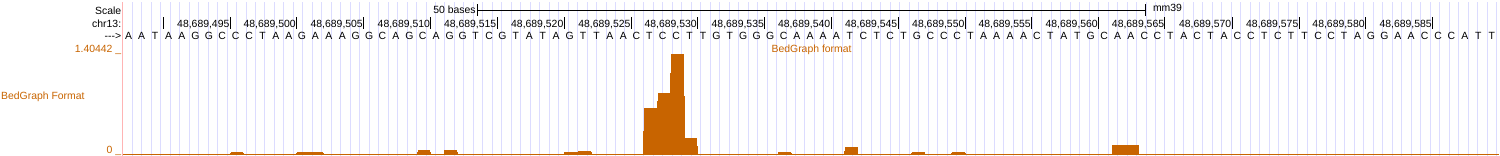

In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

from pdf2image import convert_from_path
from IPython.display import display

pdf_path = "/content/drive/MyDrive/binfo1-work/bedgraphUCSC .pdf"
images = convert_from_path(pdf_path)

for i, image in enumerate(images):
    image.save(f"page_{i+1}.png")  # 페이지 번호에 따라 이미지 저장

    # 이미지를 화면에 표시
    display(image)


IGV 에서 bam file과 bed 그래프를 track에 추가해서 한번에 확인해 봅니다.

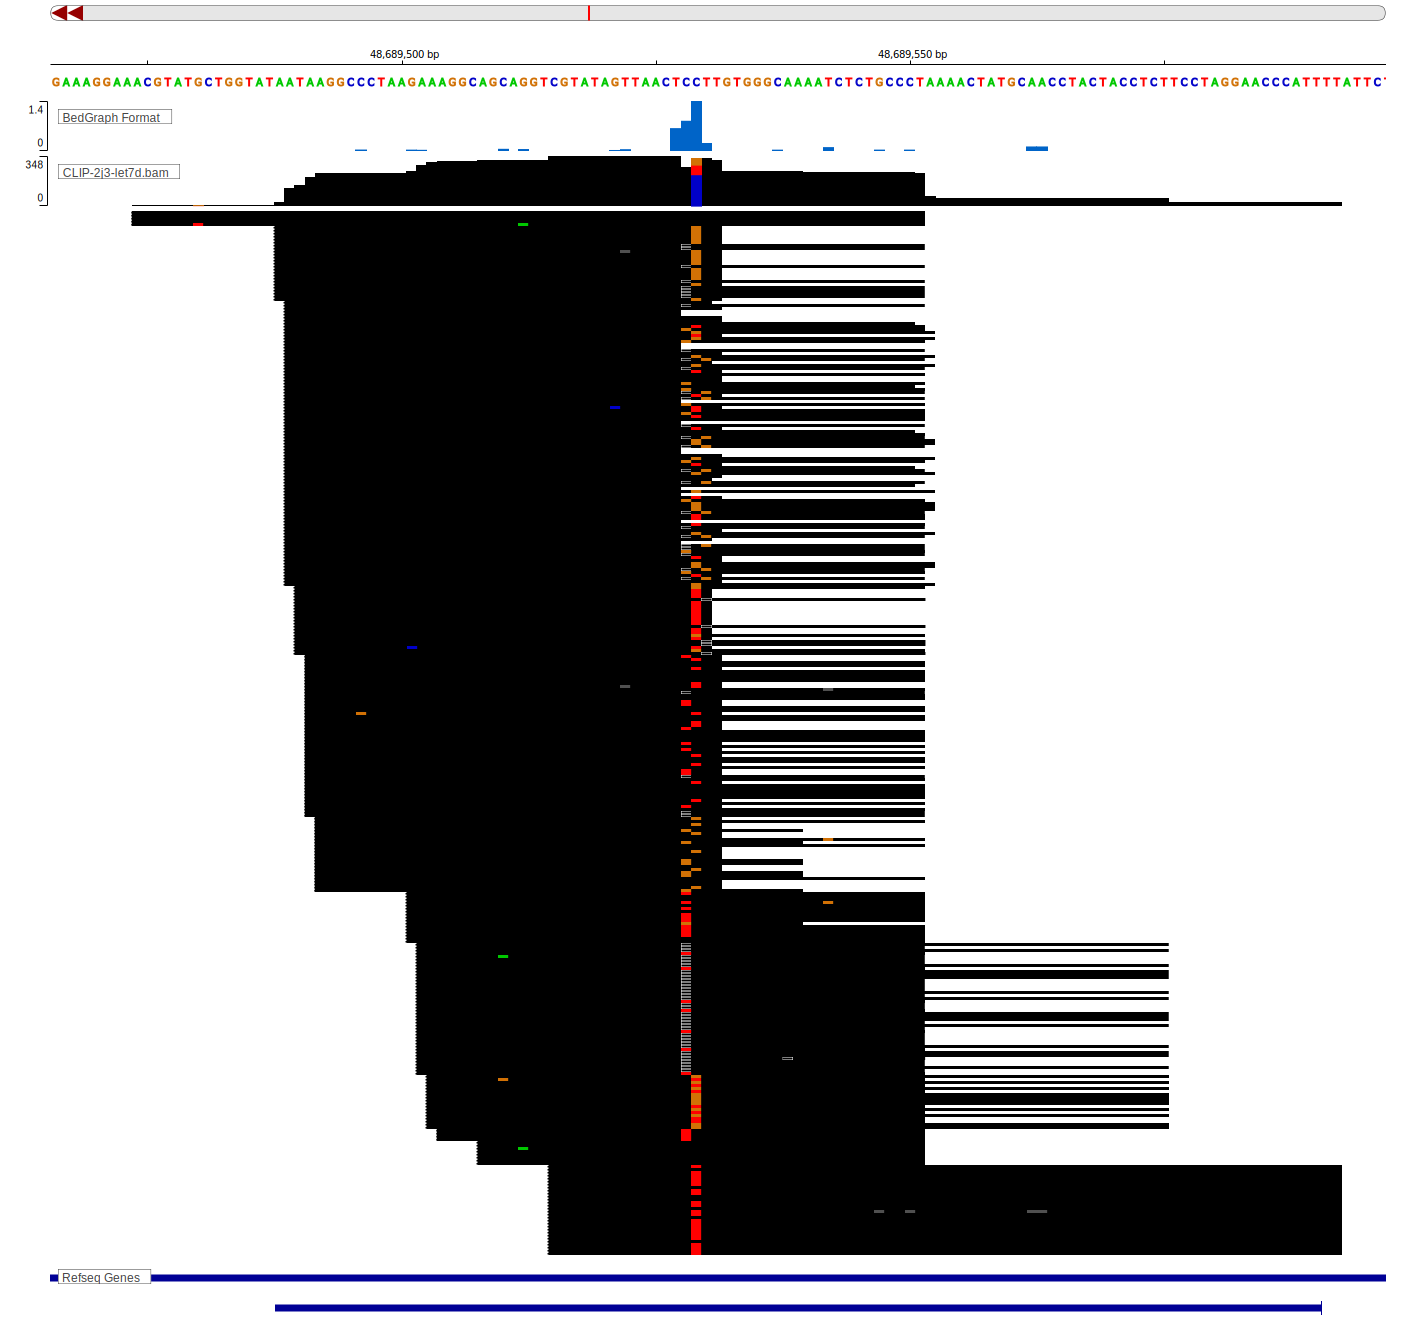

In [20]:
import matplotlib.pyplot as plt
from IPython.display import SVG

# 파일 경로
file_path = '/content/drive/MyDrive/binfo1-work/2J3IGV_final.svg'

# SVG 파일을 Colab에서 나타내기
display(SVG(filename=file_path))
